In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:/Users/ASUS/Downloads/Airline+Passenger+Satisfaction/airline_passenger_satisfaction.csv")

In [6]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [15]:
cat_var = list(data.select_dtypes("object").columns)
cat_var

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [16]:
len(cat_var)

5

In [18]:
num_var = list(data.select_dtypes("number").columns)
num_var

['ID',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [19]:
len(num_var)

19

## We can see there are 19 numerical variables and 5 categorical variables. Lets investigate missing values

In [21]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

Lets investigate the "Arrival Delay" column further in order to deal with it (drop or imput). 
My guess is the "Arrival Delay" should correlate with the "Depature Delay"

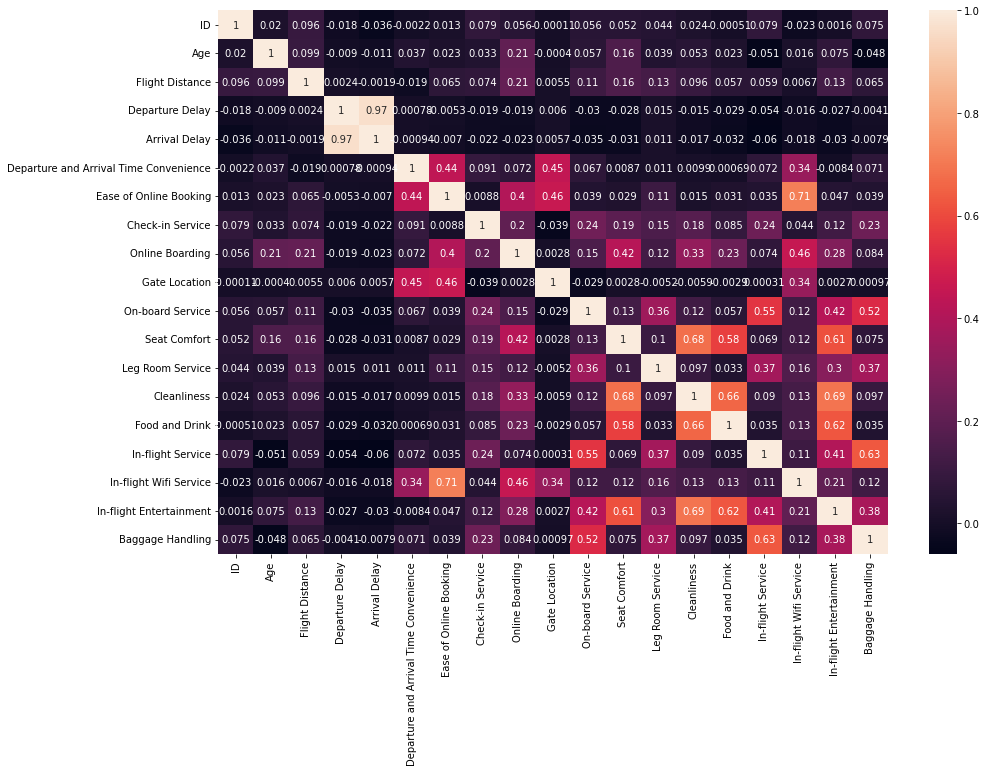

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True);

As guessed, "Arrival Delay" and "Depature Delay" are highly correlated at 0.97. Lets investigate further

In [44]:
data[["Departure Delay", "Arrival Delay"]].describe()

,Departure Delay,Arrival Delay
count,129880.000000,129487.000000
mean,14.713713,15.091129
std,38.071126,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


We can see the metrics of both dimensions are almost same which is evident why correlation is 0.97. Now, we can replace the missing values of "Arrival Delay" with the equivalent value of "Departure Delay"

In [46]:
data["Arrival Delay"] = data["Arrival Delay"].fillna(data["Departure Delay"])

In [49]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Lets investigate all numerical variuables based on their correlation coefficient

<AxesSubplot:>

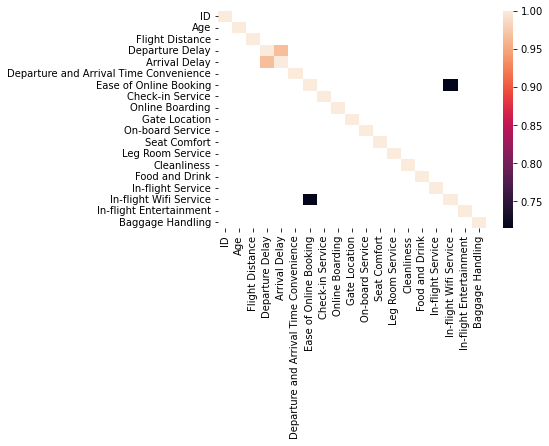

In [57]:
# 0.7 - 1.0 is Very strong and Positive correlation

sns.heatmap(data.corr()[data.corr() > 0.7])

<AxesSubplot:>

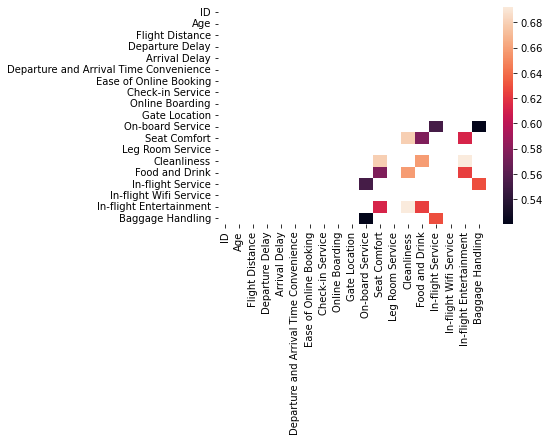

In [63]:
# 0.5 - 0.7 is strong and Positive correlation

sns.heatmap(data.corr()[(data.corr() > 0.5) & (data.corr() <= 0.7)])

<AxesSubplot:>

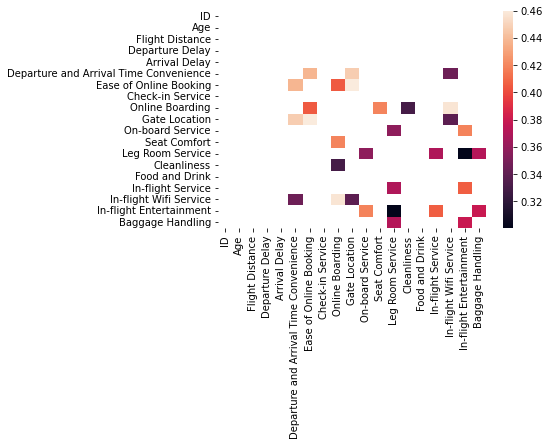

In [64]:
# 0.3 - 0.5 is moderate and Positive correlation

sns.heatmap(data.corr()[(data.corr() > 0.3) & (data.corr() <= 0.5)])

<AxesSubplot:>

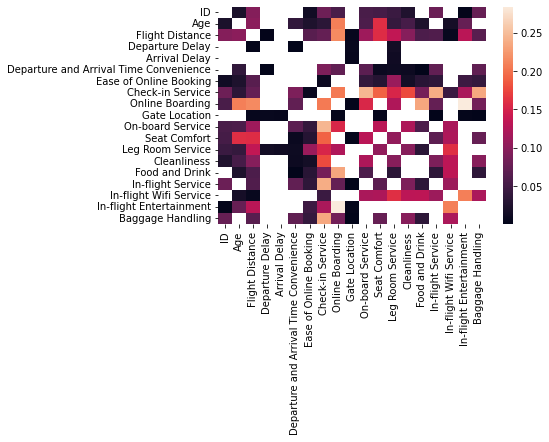

In [65]:
# 0.0 - 0.3 is weak and Positive correlation

sns.heatmap(data.corr()[(data.corr() > 0.0) & (data.corr() <= 0.3)])

## Lets do some further exploration of our data based on passenger demographics

In [72]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.160102,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.599601,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Lets see the distribution of our passengers' age

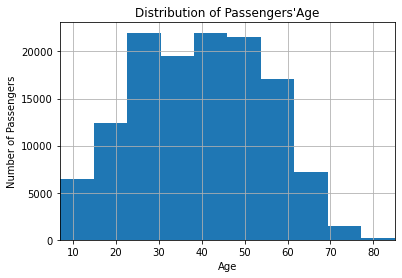

In [87]:
ax = data['Age'].hist()
ax.margins(x=0)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers'Age");
plt.show()

Distribution of Passengers' age based on Satisfaction

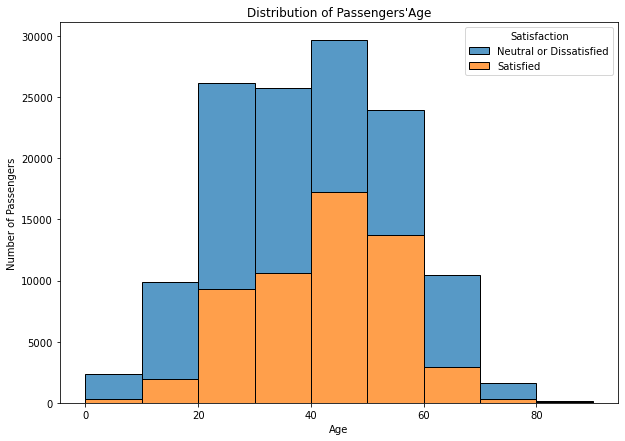

In [152]:
plt.figure(figsize = (10, 7))
sns.histplot(data, x = "Age", bins = range(0, 100, 10), hue = "Satisfaction", multiple="stack")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passengers'Age");
plt.show()

Distribution of all Categorical Variables

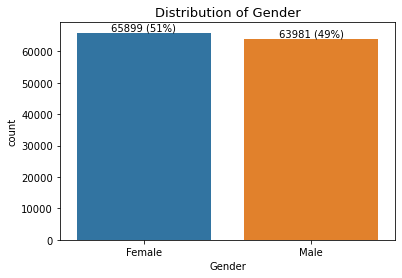

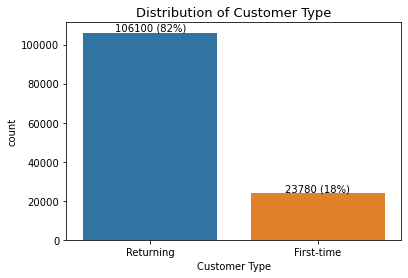

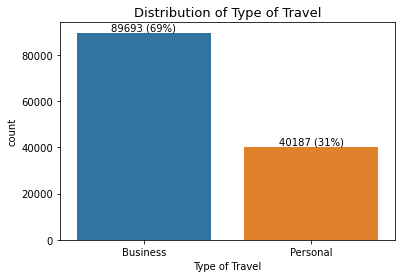

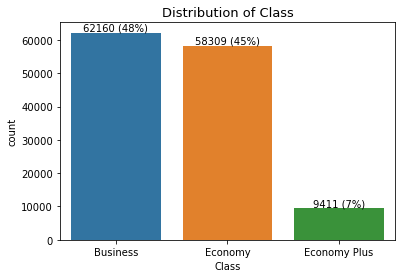

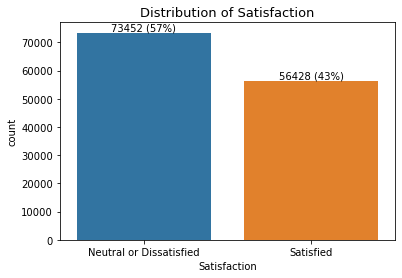

In [127]:
for i, col in enumerate(cat_var):
    plt.figure(i)
    ax = sns.countplot(x=col, data=data, order=data[col].value_counts(ascending=False).index)
    plt.title('Distribution of {}'.format(col), fontsize=13)
    abs_values = data[col].value_counts(ascending=False).values
    rel_values = data[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)

Its interesting to see that majority of the passengers in this dataset are "Returning". Lets see how this group of people affect our overall satisfaction.



## Distribution of Returning Customers 

In [100]:
return_data = data[data["Customer Type"] == "Returning"]
return_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied


Distribution of Returning Passenger's Age

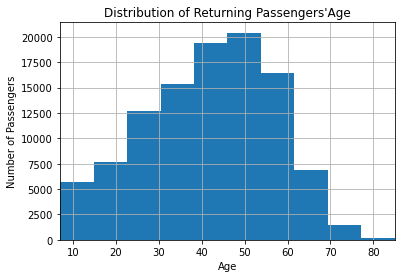

In [159]:
ax = return_data['Age'].hist()
ax.margins(x=0)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Returning Passengers'Age");
plt.show()

Distribution of Returning Passenger's Age based on Satisfaction

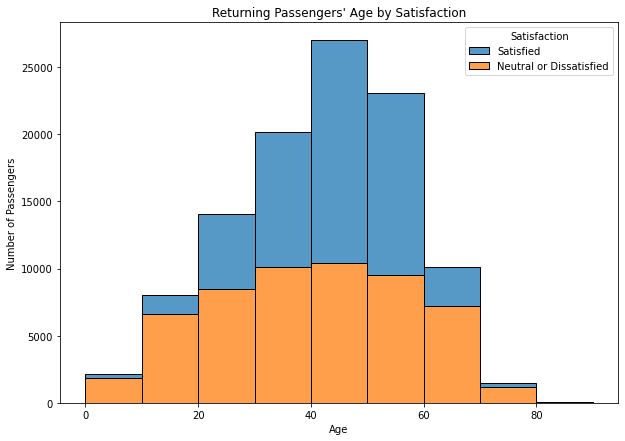

In [160]:
plt.figure(figsize = (10, 7))
sns.histplot(return_data, x = "Age", bins = range(0, 100, 10), hue = "Satisfaction", multiple="stack")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Returning Passengers' Age by Satisfaction");
plt.show()

Analyzing the Categorical Variables

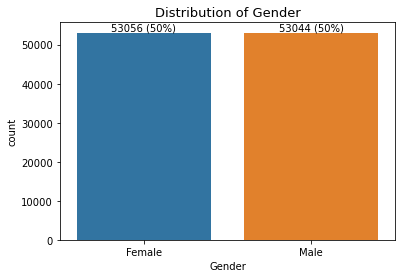

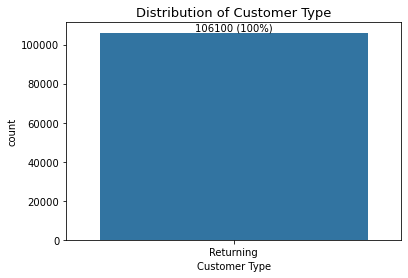

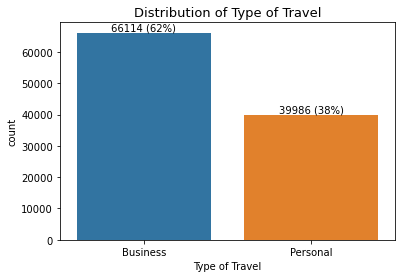

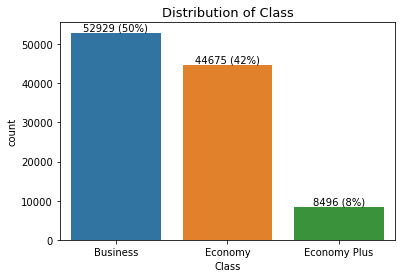

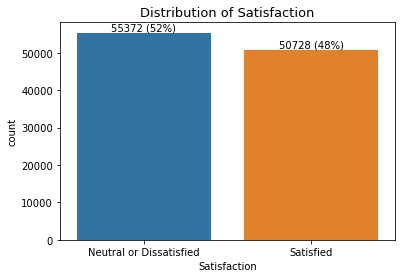

In [128]:
for i, col in enumerate(cat_var):
    plt.figure(i)
    ax = sns.countplot(x=col, data=return_data, order=return_data[col].value_counts(ascending=False).index)
    plt.title('Distribution of {}'.format(col), fontsize=13)
    abs_values = return_data[col].value_counts(ascending=False).values
    rel_values = return_data[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)

Now, It gets really really interesting. 55K returning passengers seem to have been dissatisfied with the service out of 73K. Lets check first time customers

## Distribution of First Time Customers 

In [122]:
firsttime_data = data[data["Customer Type"] == "First-time"]
firsttime_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
10,11,Female,28,First-time,Business,Business,821,0,5.0,1,...,2,2,5,2,2,4,1,2,3,Neutral or Dissatisfied
11,12,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
12,13,Male,24,First-time,Business,Economy,453,16,30.0,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
30,31,Male,35,First-time,Business,Business,212,0,0.0,2,...,4,2,5,2,2,4,2,2,5,Neutral or Dissatisfied


Distribution of First-Time Passenger's Age

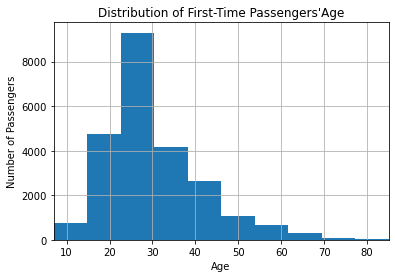

In [161]:
ax = firsttime_data['Age'].hist()
ax.margins(x=0)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of First-Time Passengers'Age");
plt.show()

Distribution of First-Time Passenger's Age based on Satisfaction

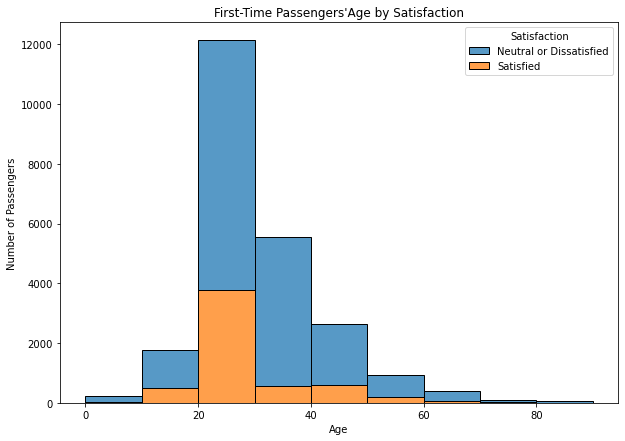

In [157]:
plt.figure(figsize = (10, 7))
sns.histplot(firsttime_data, x = "Age", bins = range(0, 100, 10), hue = "Satisfaction", multiple="stack")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("First-Time Passengers'Age by Satisfaction");
plt.show()

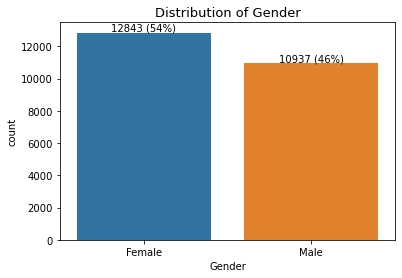

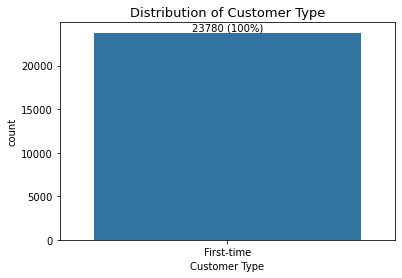

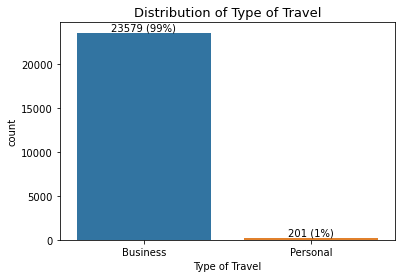

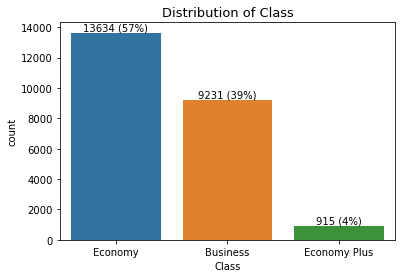

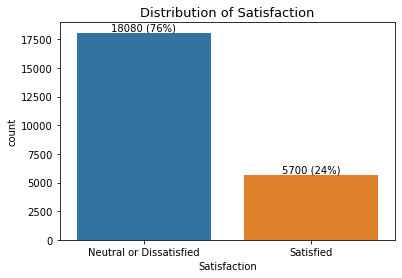

In [129]:
for i, col in enumerate(cat_var):
    plt.figure(i)
    ax = sns.countplot(x=col, data=firsttime_data, order=firsttime_data[col].value_counts(ascending=False).index)
    plt.title('Distribution of {}'.format(col), fontsize=13)
    abs_values = firsttime_data[col].value_counts(ascending=False).values
    rel_values = firsttime_data[col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)